# 6.2 Exploring Relationships

## Table of Contents

#### 1. Importing Libraries and Data

#### 2. Cleaning Data

#### 3. Exploring Relationships

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Checking version of matplotlib

matplotlib.__version__

'3.5.1'

In [3]:
#Charts stay displayed in the notebook without needing to 'call' them

%matplotlib inline

In [4]:
#Define path

path = r'C:/Users/jonsa/Documents/Career Foundry Tasks/Achievement 6'

In [5]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'airbnb_clean.csv'))

C:\Users\jonsa\AppData\Local\Temp\ipykernel_23772\485913605.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'Prepared Data', 'airbnb_clean.csv'))


## 2. Cleaning Data

In [6]:
#check for mixed types
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

name
neighbourhood_group
last_review


In [7]:
#Setting 'name' column to data type 'string'
df['name'] = df['name'].astype('str')

In [8]:
#Setting 'neighbourhood_group' to data type 'string'
df['neighbourhood_group'] = df['neighbourhood_group'].astype('str')

In [9]:
df['last_review'] = df['last_review'].astype('datetime64')

In [10]:
type(df['name'][0])

str

In [11]:
type(df['neighbourhood_group'][0])

str

In [12]:
type(df['last_review'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
#Renaming columns for visibility in visualizations

df.rename(columns = {'minimum_nights' : 'min_nights', 'number_of_reviews' : 'num_of_reviews',
                    'calculated_host_listings_count' : 'host_listing_count', 'availability_365': 'avail_365'},
                    inplace = True)

## 3. Exploring Relationships

In [14]:
#Creating correlation matrix 

df.corr()

,Unnamed: 0,id,host_id,latitude,longitude,price,min_nights,num_of_reviews,reviews_per_month,host_listing_count,avail_365
Unnamed: 0,1.000000,-0.011168,-0.042403,0.534423,0.097983,-0.036367,0.024526,0.002567,-0.004921,-0.089133,-0.108758
id,-0.011168,1.000000,0.537025,-0.055147,-0.009721,0.000924,0.007711,-0.386963,0.068264,0.153188,0.047787
host_id,-0.042403,0.537025,1.000000,-0.050382,0.008483,-0.014018,-0.023677,-0.189755,0.076884,0.083114,0.084029
latitude,0.534423,-0.055147,-0.050382,1.000000,0.575402,-0.145316,0.050510,0.050361,0.056775,-0.186001,-0.181020
longitude,0.097983,-0.009721,0.008483,0.575402,1.000000,-0.125131,-0.092226,-0.033655,-0.019576,-0.180260,-0.152264
price,-0.036367,0.000924,-0.014018,-0.145316,-0.125131,1.000000,-0.073132,-0.120011,-0.124631,0.080591,0.095542
min_nights,0.024526,0.007711,-0.023677,0.050510,-0.092226,-0.073132,1.000000,-0.120931,-0.184806,0.161526,0.106474
num_of_reviews,0.002567,-0.386963,-0.189755,0.050361,-0.033655,-0.120011,-0.120931,1.000000,0.731696,-0.120667,0.059271
reviews_per_month,-0.004921,0.068264,0.076884,0.056775,-0.019576,-0.124631,-0.184806,0.731696,1.000000,-0.115345,0.048063
host_listing_count,-0.089133,0.153188,0.083114,-0.186001,-0.180260,0.080591,0.161526,-0.120667,-0.115345,1.000000,0.161214


#### Heatmaps

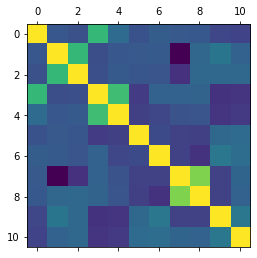

In [15]:
#Creating a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

In [16]:
sub = df[['price', 'min_nights', 'num_of_reviews', 'reviews_per_month', 'host_listing_count', 'avail_365']]

Text(0.5, 1.0, 'Correlation Matrix')

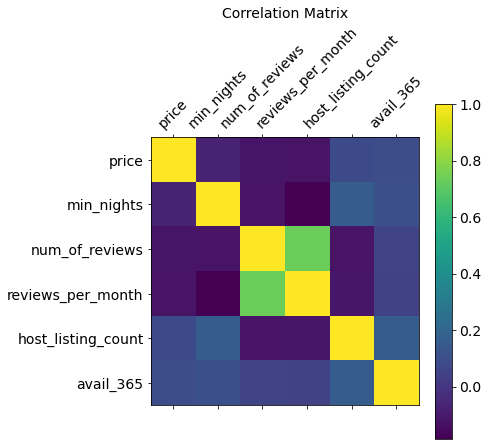

In [17]:
#Adding labels, a legend, and the size of the heatmap

f = plt.figure(figsize=(6, 6)) #figure size
plt.matshow(sub.corr(), fignum=f.number) #type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) #y axis labels
cb = plt.colorbar() #add a colored legend
cb.ax.tick_params(labelsize=14) #font size for label
plt.title('Correlation Matrix', fontsize=14) #add title

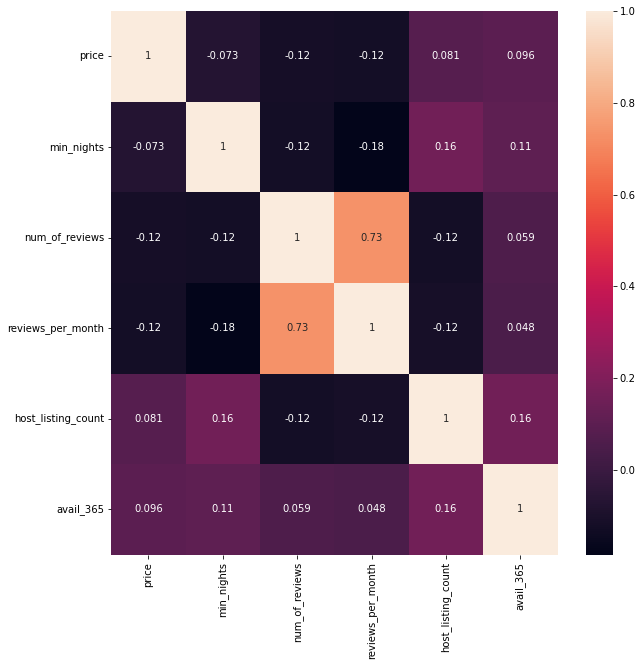

In [18]:
#Creating a subplot
f,ax = plt.subplots(figsize=(10,10))

#Creating a correlation heatmap 
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

We can see above that there aren't any strong correlations besides that of reviews_per_month and num_of_reviews which is to be expected. The next strong correlation is that between host_listing_count and avail_365 at only .16 which is rather weak. Surprisingly, no column has a strong correlation with price which I would have expected.

#### Scatterplots

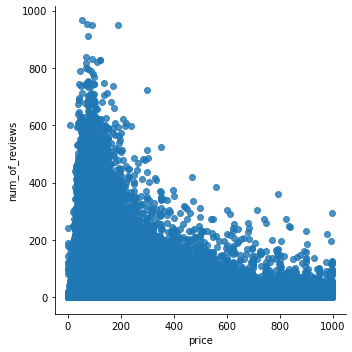

In [19]:
#Creating a scatterplot for 'num_of_reviews' and 'reviews_per_month' columns

sns.lmplot(x = 'price', y = 'num_of_reviews', data = df)

#### Pair Plots

In [20]:
#Creating a group with only the variables we want to view

sub_2 = sub[['price', 'min_nights', 'num_of_reviews', 'reviews_per_month']]

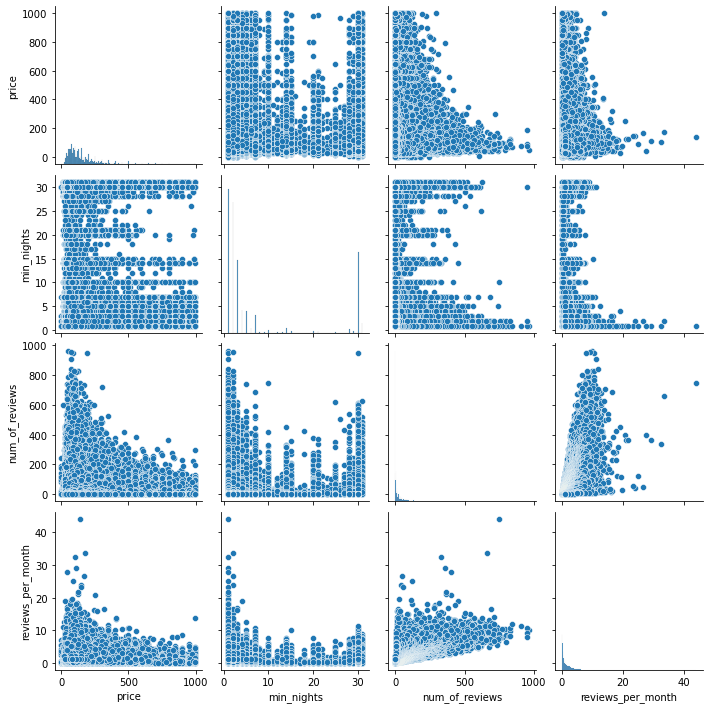

In [21]:
#Creating a pair plot

g = sns.pairplot(sub_2)

#### Categorical Plot

<AxesSubplot:xlabel='price', ylabel='Count'>

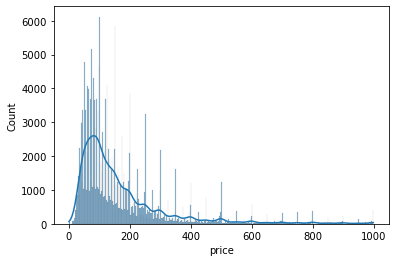

In [22]:
#Creating a categorical variables that counts price amounts

sns.histplot(df['price'], bins = 500, kde = True)

In [23]:
df.loc[df['price'] < 50, 'Price category'] = 'Low price'

In [24]:
df.loc[(df['price'] >= 50) & (df['price'] < 200), 'Price category'] = 'Mid-Range price'

In [25]:
df.loc[df['price'] >= 200, 'Price category'] = 'High price'

In [26]:
df['Price category'].value_counts(dropna = False)

Mid-Range price    140088
High price          54179
Low price           21559
Name: Price category, dtype: int64

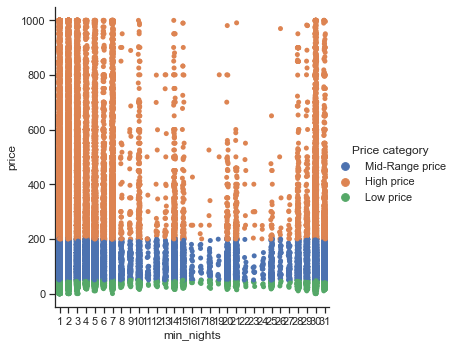

In [27]:
#Creating a categorical plot using the price categories created above

sns.set(style='ticks')
g = sns.catplot(x='min_nights', y='price', hue='Price category', data=df)